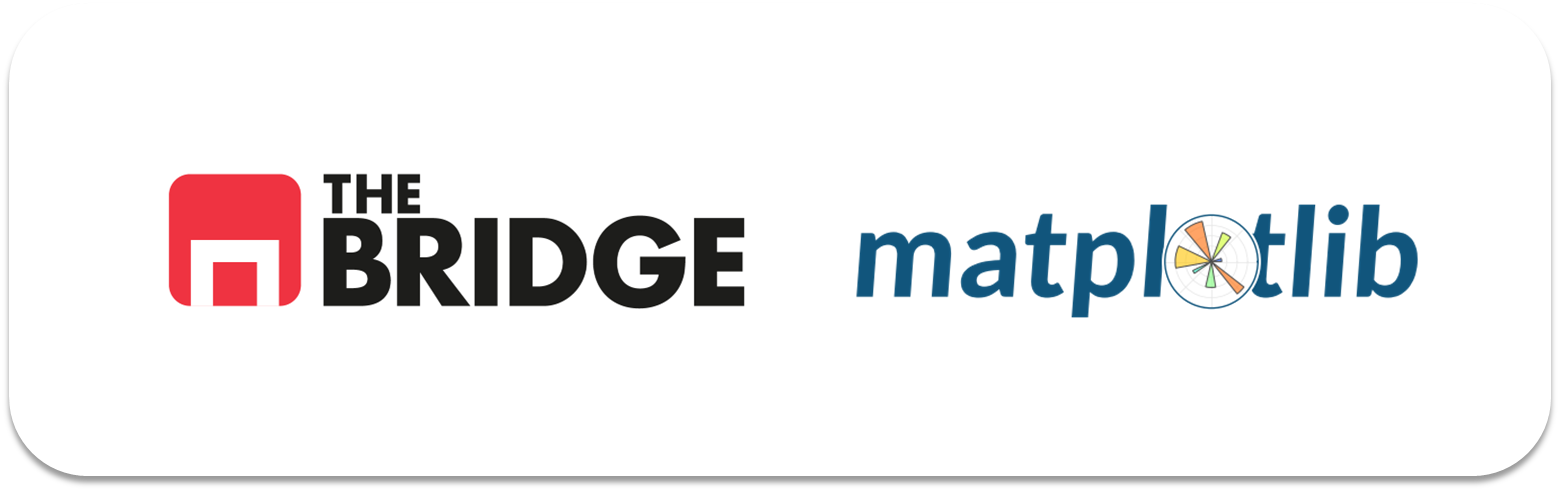

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")

print("Contenido df.head()")
print(df.head())

print("\nEstructura df.info()")
df.info()

print("\nLimpieza de Nulos")
filas_antes = len(df)
df = df.dropna()
filas_despues = len(df)

print(f"Filas ANTES de limpieza: {filas_antes}")
print(f"Filas DESPUÉS de limpieza: {filas_despues}")

Contenido df.head()
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_wat

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

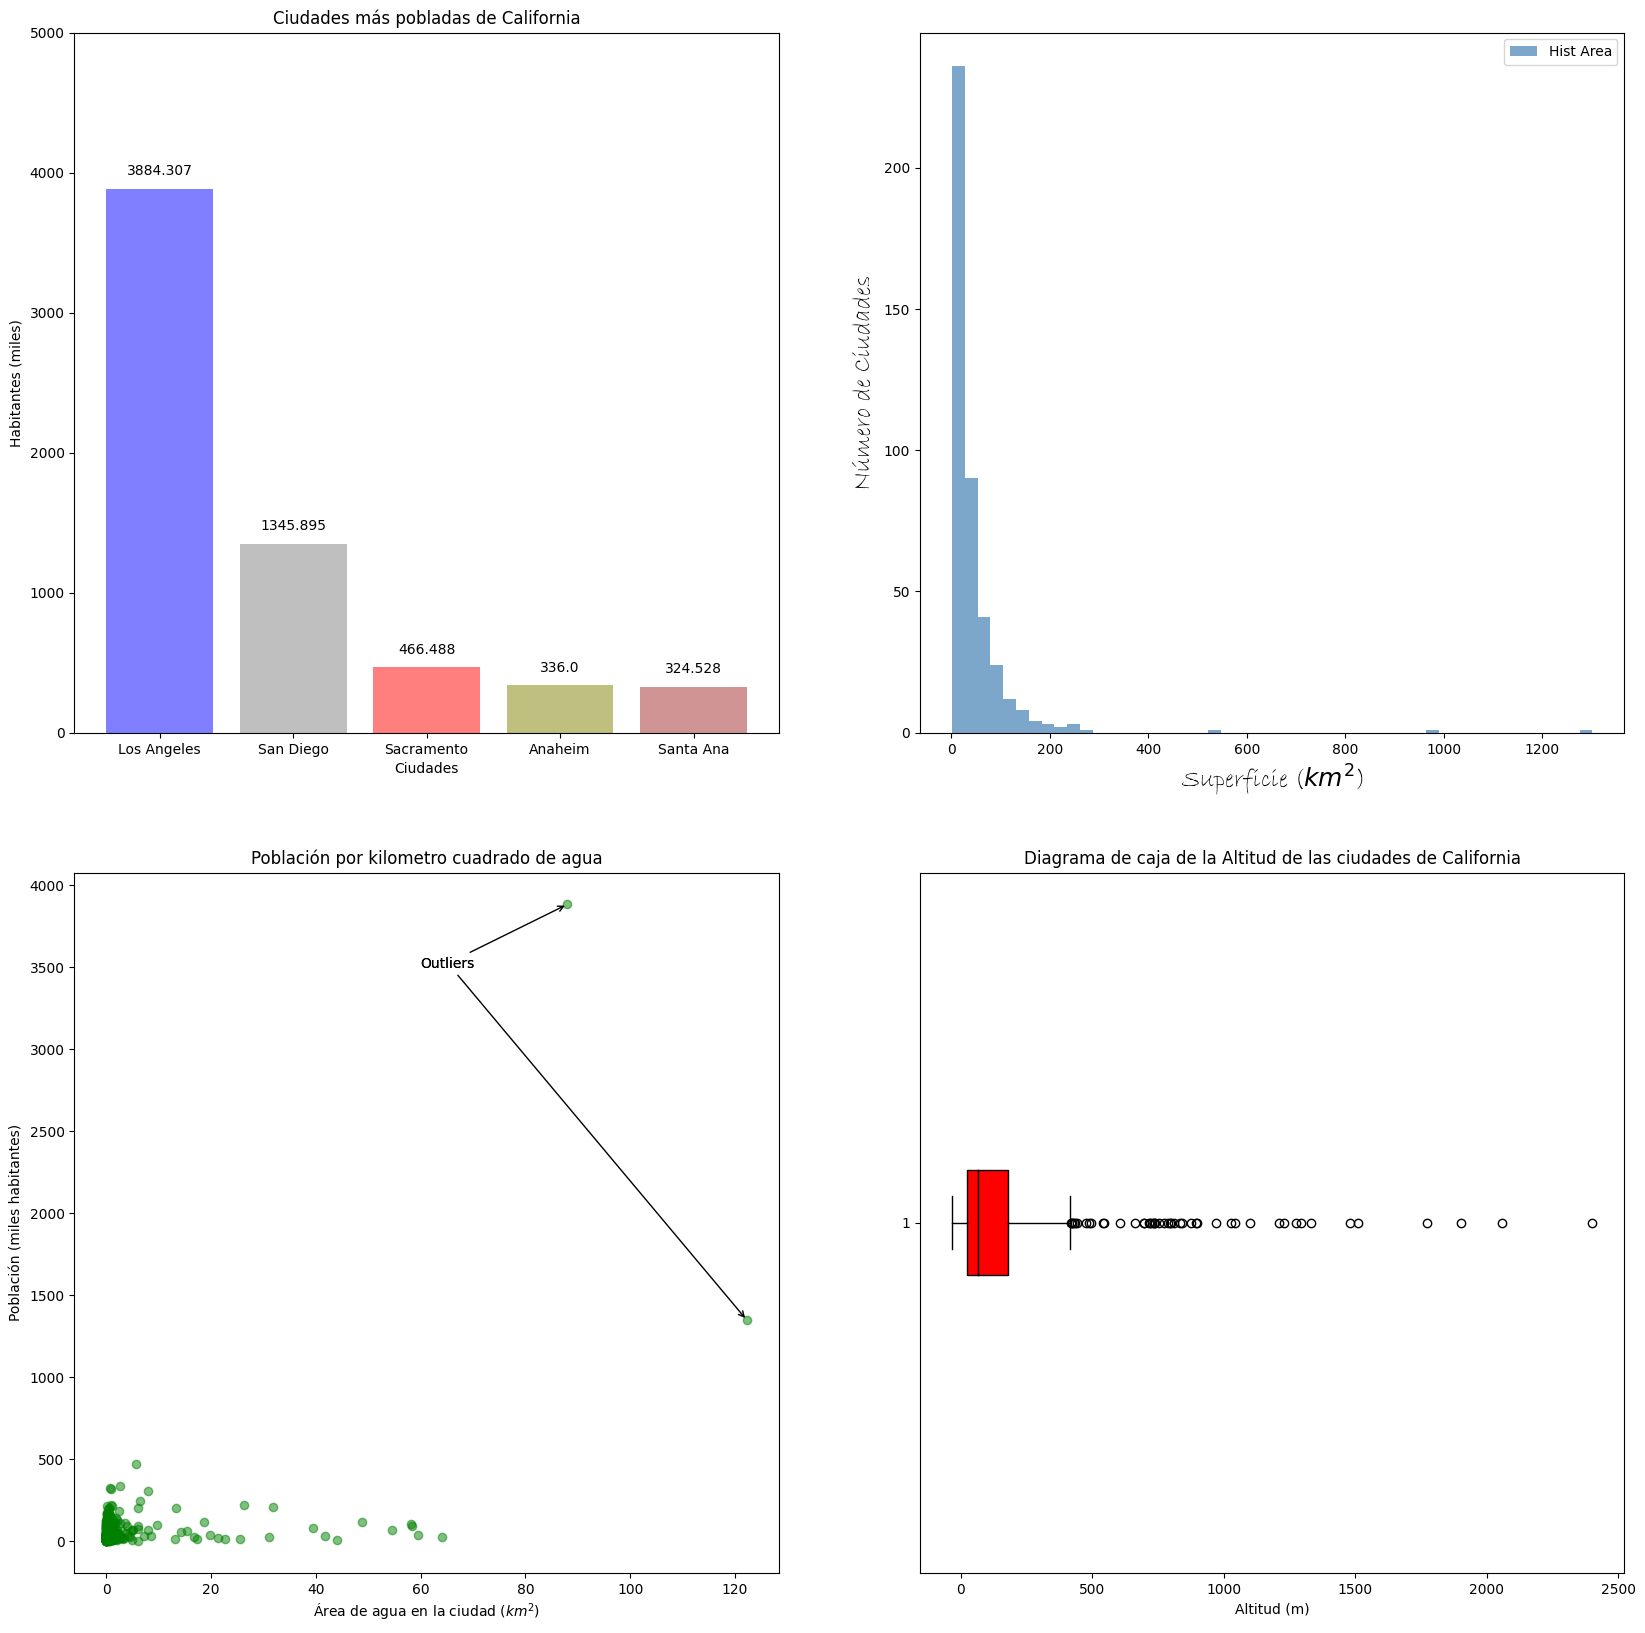

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')


In [ ]:
# Ordenar por population_total y seleccionar las 5 ciudades más pobladas
df_top5 = df.sort_values(by='population_total', ascending=False).head(5)

# Crear listas de nombres y poblaciones para el gráfico de barras
nombres = df_top5['city'].tolist()
poblaciones = df_top5['population_total'].tolist()
# Los colores deben ser: azul, gris, rojo, oliva, marrón
colores_barras = ['blue', 'gray', 'red', 'olive', 'brown']

df_scatter = df.sort_values(by='population_total', ascending=False) 

# Seleccionar los dos outliers visuales (Los Angeles y San Diego)
outlier1 = df_scatter.iloc[0] 
outlier2 = df_scatter.iloc[1]

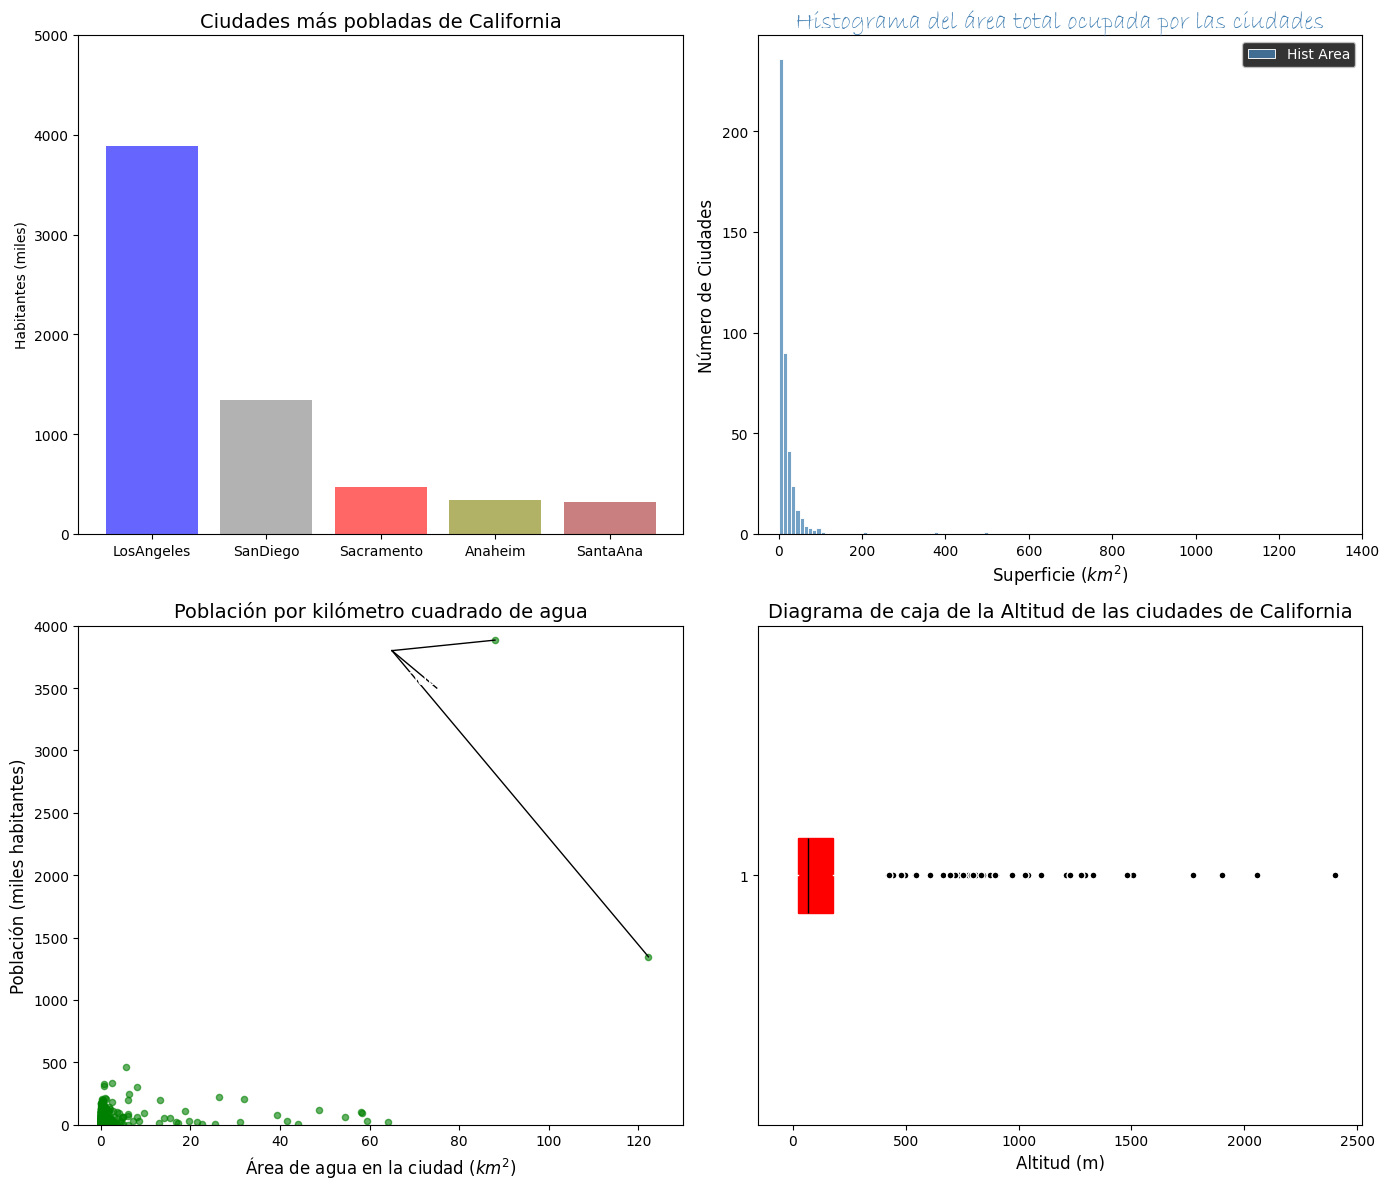

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.style.use('dark_background') 
title_font = {'family': 'Bradley Hand ITC', 'size': 18, 'color': 'steelblue'}

#GRÁFICO 1: Barras
ax1 = axes[0, 0]
barras = ax1.bar(nombres, poblaciones, color=colores_barras, alpha=0.6)
ax1.set_title("Ciudades más pobladas de California", fontsize=14)
ax1.set_ylabel("Habitantes (miles)")

for bar, pob in zip(barras, poblaciones):
    etiqueta = f'{pob:,.3f}'.replace(',', '.')
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height() + 50000 
    ax1.text(x_pos, y_pos, etiqueta, ha='center', va='bottom', fontsize=10)

# Formato del eje Y
ax1.set_yticks(range(0, 5000001, 1000000)) 
ax1.set_yticklabels([f'{i//1000}' for i in range(0, 5000001, 1000000)]) # En miles
ax1.set_ylim(0, 5000000)


# GRÁFICO 2: Histograma
ax2 = axes[0, 1]
sns.histplot(data=df, x='area_total_sq_mi', bins=50, kde=False, 
             color='steelblue', label='Hist Area', ax=ax2) 
ax2.set_title("Histograma del área total ocupada por las ciudades", fontdict=title_font)
ax2.set_xlabel("Superficie ($km^2$)", fontsize=12)
ax2.set_ylabel("Número de Ciudades", fontsize=12)
ax2.legend()
ax2.set_xlim(-50, 1400) # Ajuste de límites para coincidir con la visualización


# GRÁFICO 3: Scatter Plot
ax3 = axes[1, 0]
# Usamos las columnas en KM2 para replicar mejor los valores del eje X en la imagen
ax3.scatter(df['area_water_km2'], df['population_total'], 
            s=20, color='green', alpha=0.6)
ax3.set_title("Población por kilómetro cuadrado de agua", fontsize=14)
ax3.set_xlabel("Área de agua en la ciudad ($km^2$)", fontsize=12)
ax3.set_ylabel("Población (miles habitantes)", fontsize=12)

# Formato del eje Y (Aproximación en miles)
ax3.set_yticks(range(0, 4001000, 500000)) 
ax3.set_yticklabels([f'{i//1000}' for i in range(0, 4001000, 500000)])
ax3.set_ylim(0, 4000000)

text_x = 75 
text_y = 3500000 
ax3.text(text_x, text_y, 'Outliers', fontsize=12, ha='center', va='bottom')

# Coordenada del quiebre
joint_x = 65
joint_y = 3800000 

# Conectar Outlier 1 
pt1_x = outlier1['area_water_km2']
pt1_y = outlier1['population_total']
ax3.plot([joint_x, pt1_x], [joint_y, pt1_y], color='black', linestyle='-', linewidth=1) 

# Conectar Outlier 2 
pt2_x = outlier2['area_water_km2']
pt2_y = outlier2['population_total']
ax3.plot([joint_x, pt2_x], [joint_y, pt2_y], color='black', linestyle='-', linewidth=1)

# Pequeña línea entre el texto 'Outliers' y el punto de quiebre
ax3.plot([text_x, joint_x], [text_y, joint_y], color='black', linestyle='-', linewidth=1)
ax3.set_xlim(-5, 130) # Ajuste de límites para coincidir con la visualización


# GRÁFICO 4: Boxplot (Fila 1, Columna 1) 
ax4 = axes[1, 1]
ax4.boxplot(df['elevation_m'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'), 
            medianprops=dict(color='black'), 
            flierprops=dict(marker='o', markersize=5, markerfacecolor='black'))
ax4.set_title("Diagrama de caja de la Altitud de las ciudades de California", fontsize=14)
ax4.set_xlabel("Altitud (m)", fontsize=12)
ax4.set_yticks([1], ['1']) 

# Ajustar el espacio entre subgráficos y mostrar
plt.tight_layout()
plt.show()

Es aproximado, no esta al 100% igual porque el último no se como solucionarlo

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [ ]:
fig.savefig('practica_obligatoria_visualizacion_basica.png', bbox_inches='tight', dpi=300)

print("¡Figura guardada exitosamente como 'practica_obligatoria_visualizacion_basica.png'!")

¡Figura guardada exitosamente como 'practica_obligatoria_visualizacion_basica.png'!
Recuerda subir este archivo PNG junto con tu notebook a tu repositorio.
